In [1]:
import numpy as np
import pandas as pd
import re

c:\Users\karal\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

122

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sector 24,3.2,59259.0,540.0,Plot area 60(50.17 sq.m.),14,14,3+,not available,6.0,West,1 to 5 Year Old,"['Dlf phase 3 metro station', 'Micromax moulsari avenue metro station', 'Dlf phase 2 metro station', 'Guru dronacharya metro station', 'Indusind bank cyber city metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Icici bank ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Abn amro bank ATM', 'Citibank ATM', 'Kotak mahindra ATM', 'Citibank ATM', 'Dental Cure and Care Centre', ""Dr. Khullar's Dental Clinic"", 'Garg Dental Care', 'Shri Ram Memorial Hospital', 'R.N Clinic', 'Dental Harbour', 'Asha Multispeciality Clinic', 'Upkar Clinic', ""St Stephen's Hospital Health Care Facility"", 'Relief Physiotherapy Clinic', 'Darpan Skin & Mind Clinic', 'Cosmodentz Dental Clinic', 'RBS Dental Clinic', 'Kailash Nursing Home Gurgaon', 'Krishna Family Clinic', 'Durga Poly Clinic', 'Anahat Hospital', 'Pharmacy', 'Shri Balaji Medical Store', 'State bank of india', 'Icici bank', 'Deutsche bank', 'Standard chartered bank', 'PVR Cinames', 'The God Father', 'Machaan', 'Food Court', 'Mc Donalds', 'barrique', ""McDonald's""]","['14 Bed', '14 Wardrobe', '1 Water Purifier', '1 Fridge', '14 AC', '14 TV', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Sofa', 'No Stove', 'No Washing Machine']","['Water Storage', 'Park']"


## 1. areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3311,1.30,1671.0,Super Built up area 1671(155.24 sq.m.)Carpet area: 1169 sq.ft. (108.6 sq.m.)
341,0.56,990.0,Super Built up area 990(91.97 sq.m.)
1670,1.37,1538.0,Super Built up area 1538(142.88 sq.m.)
2400,2.01,1489.0,Super Built up area 1516(140.84 sq.m.)Carpet area: 1433 sq.ft. (133.13 sq.m.)
876,0.53,1100.0,Super Built up area 1100(102.19 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2799,3.87,flat,2250.0,Super Built up area 2250(209.03 sq.m.)Carpet area: 1249.65 sq.ft. (116.1 sq.m.),2250.0,NaN,1249.65
245,0.97,flat,1103.0,Built Up area: 1103 (102.47 sq.m.),NaN,1103.0,NaN
473,3.30,house,1665.0,Plot area 185(154.68 sq.m.),NaN,NaN,NaN
2572,1.75,house,2800.0,Carpet area: 2800 (260.13 sq.m.),NaN,NaN,2800.00
2399,4.00,house,6001.0,Plot area 6000(557.42 sq.m.),NaN,NaN,NaN


In [12]:
df.duplicated().sum()

122

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,3.20,house,540.0,Plot area 60(50.17 sq.m.),NaN,NaN,NaN
1,3.93,house,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 1622 sq.ft. (150.69 sq.m.),NaN,1622.0,NaN
7,3.20,house,2367.0,Plot area 263(219.9 sq.m.),NaN,NaN,NaN
15,NaN,house,NaN,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
19,16.00,house,4235.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,3.2,house,540.0,Plot area 60(50.17 sq.m.),NaN,NaN,NaN
7,3.2,house,2367.0,Plot area 263(219.9 sq.m.),NaN,NaN,NaN
15,NaN,house,NaN,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
19,16.0,house,4235.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
40,1.4,house,1609.0,Plot area 166(138.8 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,3.20,house,540.0,Plot area 60(50.17 sq.m.),NaN,60.00,NaN
7,3.20,house,2367.0,Plot area 263(219.9 sq.m.),NaN,263.00,NaN
15,NaN,house,NaN,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
19,16.00,house,4235.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
40,1.40,house,1609.0,Plot area 166(138.8 sq.m.),NaN,166.00,NaN
55,6.25,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
61,8.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
63,2.50,house,963.0,Plot area 107(89.47 sq.m.),NaN,107.00,NaN
65,2.90,house,2500.0,Plot area 2500(232.26 sq.m.),NaN,2500.00,NaN
66,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN


In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,3.20,house,540.0,Plot area 60(50.17 sq.m.),NaN,540.00,NaN
7,3.20,house,2367.0,Plot area 263(219.9 sq.m.),NaN,2367.00,NaN
15,NaN,house,NaN,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
19,16.00,house,4235.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
40,1.40,house,1609.0,Plot area 166(138.8 sq.m.),NaN,166.00,NaN
55,6.25,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
61,8.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
63,2.50,house,963.0,Plot area 107(89.47 sq.m.),NaN,963.00,NaN
65,2.90,house,2500.0,Plot area 2500(232.26 sq.m.),NaN,2500.00,NaN
66,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN


In [25]:
# update the original dataframe
df.update(all_nan_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [27]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,independent,sector 24,3.20,59259.0,540.0,Plot area 60(50.17 sq.m.),14,14,3+,not available,6.0,West,1 to 5 Year Old,"['Dlf phase 3 metro station', 'Micromax moulsari avenue metro station', 'Dlf phase 2 metro station', 'Guru dronacharya metro station', 'Indusind bank cyber city metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Icici bank ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Abn amro bank ATM', 'Citibank ATM', 'Kotak mahindra ATM', 'Citibank ATM', 'Dental Cure and Care Centre', ""Dr. Khullar's Dental Clinic"", 'Garg Dental Care', 'Shri Ram Memorial Hospital', 'R.N Clinic', 'Dental Harbour', 'Asha Multispeciality Clinic', 'Upkar Clinic', ""St Stephen's Hospital Health Care Facility"", 'Relief Physiotherapy Clinic', 'Darpan Skin & Mind Clinic', 'Cosmodentz Dental Clinic', 'RBS Dental Clinic', 'Kailash Nursing Home Gurgaon', 'Krishna Family Clinic', 'Durga Poly Clinic', 'Anahat Hospital', 'Pharmacy', 'Shri Balaji Medical Store', 'State bank of india', 'Icici bank', 'Deutsche bank', 'Standard chartered bank', 'PVR Cinames', 'The God Father', 'Machaan', 'Food Court', 'Mc Donalds', 'barrique', ""McDonald's""]","['14 Bed', '14 Wardrobe', '1 Water Purifier', '1 Fridge', '14 AC', '14 TV', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Sofa', 'No Stove', 'No Washing Machine']","['Water Storage', 'Park']",NaN,540.0,NaN
1,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 1622 sq.ft. (150.69 sq.m.),19,17,3,"study room,servant room,store room,pooja room",4.0,North-West,1 to 5 Year Old,"['Iffco chowk metro station', 'Citi bank ATM', 'Punjab national bank ATM', 'Icici bank ATM', 'Punjab national bank ATM', 'State bank of india ATM', 'Hdfc bank ATM', 'Hsbc bank ATM', 'Sangwan Hospital Gurgaon', 'Thukral Hospital', 'Apollo Cradle Hospital Gurgaon', 'Nagpal Nursing Home Gurgaon', 'Privat Hospital', 'Umkal Hospital', 'Community Center Sukhrali', 'Sector-14 Market', 'Catholic syrian bank', 'Karur vysay bank', 'Standard chartered bank', 'Oriental bank of commerce', 'Hdfc bank', 'Icici bank', 'Swagath', 'distillery', 'Walking Street', 'Gung the palace Korean restaurant', 'ADDA', 'KFC', 'Ardor 29', 'Gravity Space Bar', 'Black Mambaa', 'Tocpao', 'Bikanervala', 'Spaghetti Kitchen & Bar', 'Pizza Hut', 'Gola Sizzles', ""Hops 'N' Brew"", 'The Oriental Bloom Chinese and Thai', 'Zura', ""Domino's Pizza"", ""McDonald's"", 'Park Baluchi', 'MoB Ministory of Beer', 'Beer & Whisky Bar', 'Dhabba', 'Roots', 'Cafe Coffee Day', 'Management Development Institute']",NaN,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Visitor Parking', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Club house / Community Center']",NaN,1622.0,NaN
2,flat,signature global the millennia,sector 37d,0.60,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet area: 596.12 sq.ft. (55.38 sq.m.),2,2,3,not available,7.0,NaN,0 to 1 Year Old,"['Jharsha Chowk', 'Hero Honda Chowk', 'Rajiv Chowk', 'Umang Bhawaj Chawk', 'IMT Manesar', 'NH 8', 'Delhi', 'AIIMS Jhajjar', 'SGT Medical College', 'Vedic Hospital', 'Balaji Hospital', 'Dwarka Expressway', 'Gurgaon Railway Station', 'Basai Dhancourt Railway Station', 'Signature tower']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Park', 'Shopping Centre', 'Fitness Centre / GYM']",650.0,NaN,596.12
3,flat,shree vardhman victoria,sector 70,1.80,9230.0,1950.0,Carpet area: 1950 (181.16 sq.m.),3,5,3,not available,0.0,NaN,0 to 1 Year Old,"['Airia Mall', 'Golf Course Extn Road', 'Sohn

## 2.additionalRoom

In [28]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [29]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [30]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
214,not available,0,0,0,0,0
770,"pooja room,study room",1,0,0,1,0
1380,"pooja room,servant room",0,1,0,1,0
1658,store room,0,0,1,0,0
3191,servant room,0,1,0,0,0


In [31]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 24,3.20,59259.0,540.0,Plot area 60(50.17 sq.m.),14,14,3+,not available,6.0,West,1 to 5 Year Old,"['Dlf phase 3 metro station', 'Micromax moulsari avenue metro station', 'Dlf phase 2 metro station', 'Guru dronacharya metro station', 'Indusind bank cyber city metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Icici bank ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Abn amro bank ATM', 'Citibank ATM', 'Kotak mahindra ATM', 'Citibank ATM', 'Dental Cure and Care Centre', ""Dr. Khullar's Dental Clinic"", 'Garg Dental Care', 'Shri Ram Memorial Hospital', 'R.N Clinic', 'Dental Harbour', 'Asha Multispeciality Clinic', 'Upkar Clinic', ""St Stephen's Hospital Health Care Facility"", 'Relief Physiotherapy Clinic', 'Darpan Skin & Mind Clinic', 'Cosmodentz Dental Clinic', 'RBS Dental Clinic', 'Kailash Nursing Home Gurgaon', 'Krishna Family Clinic', 'Durga Poly Clinic', 'Anahat Hospital', 'Pharmacy', 'Shri Balaji Medical Store', 'State bank of india', 'Icici bank', 'Deutsche bank', 'Standard chartered bank', 'PVR Cinames', 'The God Father', 'Machaan', 'Food Court', 'Mc Donalds', 'barrique', ""McDonald's""]","['14 Bed', '14 Wardrobe', '1 Water Purifier', '1 Fridge', '14 AC', '14 TV', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Sofa', 'No Stove', 'No Washing Machine']","['Water Storage', 'Park']",NaN,540.0,NaN,0,0,0,0,0
1,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 1622 sq.ft. (150.69 sq.m.),19,17,3,"study room,servant room,store room,pooja room",4.0,North-West,1 to 5 Year Old,"['Iffco chowk metro station', 'Citi bank ATM', 'Punjab national bank ATM', 'Icici bank ATM', 'Punjab national bank ATM', 'State bank of india ATM', 'Hdfc bank ATM', 'Hsbc bank ATM', 'Sangwan Hospital Gurgaon', 'Thukral Hospital', 'Apollo Cradle Hospital Gurgaon', 'Nagpal Nursing Home Gurgaon', 'Privat Hospital', 'Umkal Hospital', 'Community Center Sukhrali', 'Sector-14 Market', 'Catholic syrian bank', 'Karur vysay bank', 'Standard chartered bank', 'Oriental bank of commerce', 'Hdfc bank', 'Icici bank', 'Swagath', 'distillery', 'Walking Street', 'Gung the palace Korean restaurant', 'ADDA', 'KFC', 'Ardor 29', 'Gravity Space Bar', 'Black Mambaa', 'Tocpao', 'Bikanervala', 'Spaghetti Kitchen & Bar', 'Pizza Hut', 'Gola Sizzles', ""Hops 'N' Brew"", 'The Oriental Bloom Chinese and Thai', 'Zura', ""Domino's Pizza"", ""McDonald's"", 'Park Baluchi', 'MoB Ministory of Beer', 'Beer & Whisky Bar', 'Dhabba', 'Roots', 'Cafe Coffee Day', 'Management Development Institute']",NaN,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Visitor Parking', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Club house / Community Center']",NaN,1622.0,NaN,1,1,1,1,0
2,flat,signature global the millennia,sector 37d,0.60,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet area: 596.12 sq.ft. (55.38 sq.m.),2,2,3,not available,7.0,NaN,0 to 1 Year Old,"['Jharsha Chowk', 'Hero Honda Chowk', 'Rajiv Chowk', 'Umang Bhawaj Chawk', 'IMT Manesar', 'NH 8', 'Delhi', 'AIIMS Jhajjar', 'SGT Medical College', 'Vedic Hospital', 'Balaji Hospital', 'Dwarka Expressway', 'Gurgaon Railway Station', 'Basai Dhancourt Railway Station', 'Signature tower']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Park', 'Shopping Centre', 'Fitness Centre / GYM']",650.0,NaN,596.12,0,0,0,0,0
3,flat,shree vardhman victoria,sector 70,1.80,9230.0,1950.0,Carpet area: 1950 (181.16 sq.m.),3,5,3,n

## 3.agePossession

In [32]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Dec 2025                 7
Aug 2023                 7
Jun 2024                 7
Nov 2023                 5
Aug 2024                 4
Oct 2023                 4
Sep 2023                 4
Jul 2024                 4
By 2025                  4
Nov 2024                 3
Feb 2024                 3
May 2024                 3
Jan 2025                 3
Aug 2025                 2
Apr 2026                 2
Jul 2025                 2
Jan 2026                 2
Jun 2027                 2
Jul 2027                 2
Sep 2025                 2
Mar 2025                 2
Dec 2026      

In [33]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [34]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [35]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 24,3.20,59259.0,540.0,Plot area 60(50.17 sq.m.),14,14,3+,not available,6.0,West,Relatively New,"['Dlf phase 3 metro station', 'Micromax moulsari avenue metro station', 'Dlf phase 2 metro station', 'Guru dronacharya metro station', 'Indusind bank cyber city metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Icici bank ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Abn amro bank ATM', 'Citibank ATM', 'Kotak mahindra ATM', 'Citibank ATM', 'Dental Cure and Care Centre', ""Dr. Khullar's Dental Clinic"", 'Garg Dental Care', 'Shri Ram Memorial Hospital', 'R.N Clinic', 'Dental Harbour', 'Asha Multispeciality Clinic', 'Upkar Clinic', ""St Stephen's Hospital Health Care Facility"", 'Relief Physiotherapy Clinic', 'Darpan Skin & Mind Clinic', 'Cosmodentz Dental Clinic', 'RBS Dental Clinic', 'Kailash Nursing Home Gurgaon', 'Krishna Family Clinic', 'Durga Poly Clinic', 'Anahat Hospital', 'Pharmacy', 'Shri Balaji Medical Store', 'State bank of india', 'Icici bank', 'Deutsche bank', 'Standard chartered bank', 'PVR Cinames', 'The God Father', 'Machaan', 'Food Court', 'Mc Donalds', 'barrique', ""McDonald's""]","['14 Bed', '14 Wardrobe', '1 Water Purifier', '1 Fridge', '14 AC', '14 TV', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Sofa', 'No Stove', 'No Washing Machine']","['Water Storage', 'Park']",NaN,540.0,NaN,0,0,0,0,0
1,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 1622 sq.ft. (150.69 sq.m.),19,17,3,"study room,servant room,store room,pooja room",4.0,North-West,Relatively New,"['Iffco chowk metro station', 'Citi bank ATM', 'Punjab national bank ATM', 'Icici bank ATM', 'Punjab national bank ATM', 'State bank of india ATM', 'Hdfc bank ATM', 'Hsbc bank ATM', 'Sangwan Hospital Gurgaon', 'Thukral Hospital', 'Apollo Cradle Hospital Gurgaon', 'Nagpal Nursing Home Gurgaon', 'Privat Hospital', 'Umkal Hospital', 'Community Center Sukhrali', 'Sector-14 Market', 'Catholic syrian bank', 'Karur vysay bank', 'Standard chartered bank', 'Oriental bank of commerce', 'Hdfc bank', 'Icici bank', 'Swagath', 'distillery', 'Walking Street', 'Gung the palace Korean restaurant', 'ADDA', 'KFC', 'Ardor 29', 'Gravity Space Bar', 'Black Mambaa', 'Tocpao', 'Bikanervala', 'Spaghetti Kitchen & Bar', 'Pizza Hut', 'Gola Sizzles', ""Hops 'N' Brew"", 'The Oriental Bloom Chinese and Thai', 'Zura', ""Domino's Pizza"", ""McDonald's"", 'Park Baluchi', 'MoB Ministory of Beer', 'Beer & Whisky Bar', 'Dhabba', 'Roots', 'Cafe Coffee Day', 'Management Development Institute']",NaN,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Visitor Parking', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Club house / Community Center']",NaN,1622.0,NaN,1,1,1,1,0
2,flat,signature global the millennia,sector 37d,0.60,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet area: 596.12 sq.ft. (55.38 sq.m.),2,2,3,not available,7.0,NaN,New Property,"['Jharsha Chowk', 'Hero Honda Chowk', 'Rajiv Chowk', 'Umang Bhawaj Chawk', 'IMT Manesar', 'NH 8', 'Delhi', 'AIIMS Jhajjar', 'SGT Medical College', 'Vedic Hospital', 'Balaji Hospital', 'Dwarka Expressway', 'Gurgaon Railway Station', 'Basai Dhancourt Railway Station', 'Signature tower']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Park', 'Shopping Centre', 'Fitness Centre / GYM']",650.0,NaN,596.12,0,0,0,0,0
3,flat,shree vardhman victoria,sector 70,1.80,9230.0,1950.0,Carpet area: 1950 (181.16 sq.m.),3,5,3,not av

## 4.furnishDetails

In [37]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1157,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
795,[],"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
1250,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
2293,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2481,"['5 Fan', '1 Exhaust Fan', '1 Geyser', '14 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Security Personnel']"


In [38]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [39]:
furnishings_df.shape

(3803, 19)

In [40]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\karal\AppData\Local\Temp\ipykernel_14036\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [41]:
furnishings_df.sample(5)

,TV,Dining Table,Modular Kitchen,Fridge,Geyser,Bed,Water Purifier,Washing Machine,Microwave,Curtains,Exhaust Fan,Sofa,Fan,AC,Wardrobe,Stove,Chimney,Light
1442,0,0,1,0,1,0,0,0,0,0,1,0,3,1,6,0,1,8
486,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
731,0,1,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,3
3133,0,0,1,0,0,0,0,0,0,0,0,0,15,0,0,0,0,15


In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [44]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

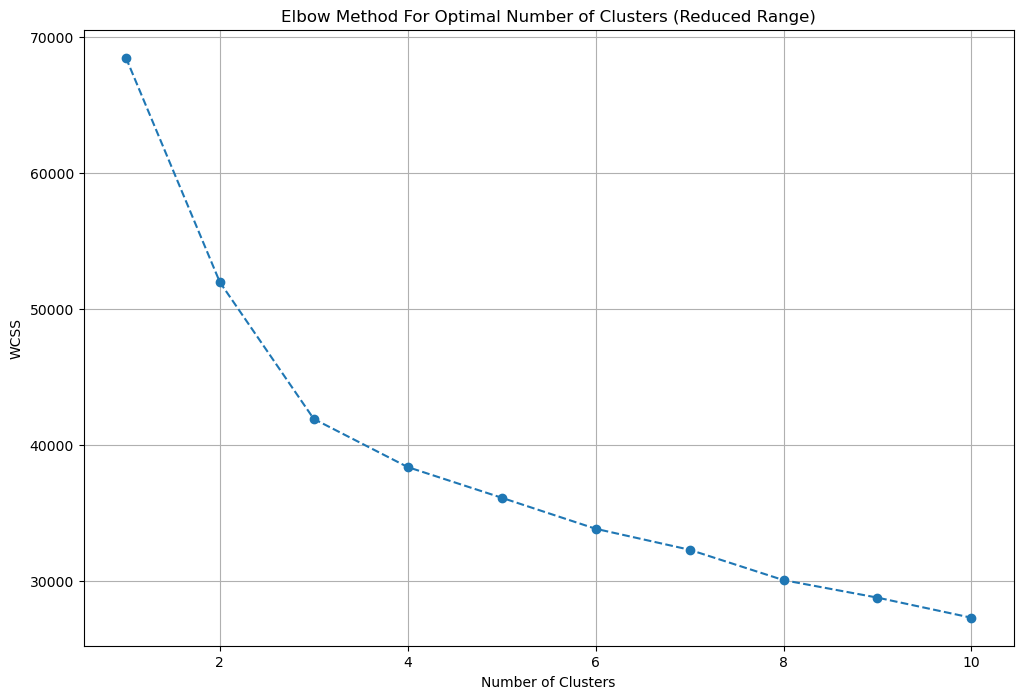

In [45]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [46]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [47]:
df = df.iloc[:,:-18]

In [48]:
df['furnishing_type'] = cluster_assignments

In [49]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1607,"['1 Wardrobe', '1 Fan', '1 Geyser', '1 Microwave', '1 Light', '1 Curtains', '1 Chimney', '1 AC', '1 TV', 'No Bed', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Fridge', 'No Sofa', 'No Stove', 'No Washing Machine', 'No Water Purifier']",1
1142,"['1 Bed', '1 Wardrobe', '1 Fan', '1 Sofa', '1 Light', '1 AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
897,[],1
1081,"['5 Fan', '1 Exhaust Fan', '3 Geyser', '24 Light', '1 Chimney', '1 Modular Kitchen', '4 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
1373,"['1 Water Purifier', '1 Fridge', '1 Stove', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine']",1


## 5.features

In [50]:
df[['society','features']].sample(5)

,society,features
1361,dlf park place,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
900,adani aangan arcade,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Club house / Community Center']"
1594,dlf carlton estate,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Piped-gas', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
1976,essel towers,NaN
2836,tata primanti,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [51]:
df['features'].isnull().sum()

635

In [52]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [53]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [54]:
temp_df = df[df['features'].isnull()]

In [55]:
temp_df.shape

(635, 26)

In [56]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [57]:
df.loc[temp_df.index,'features'] = x.values

In [58]:
df['features'].isnull().sum()

481

In [59]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [60]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [61]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3588,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2270,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
1869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
features_binary_df.shape

(3803, 130)

In [63]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

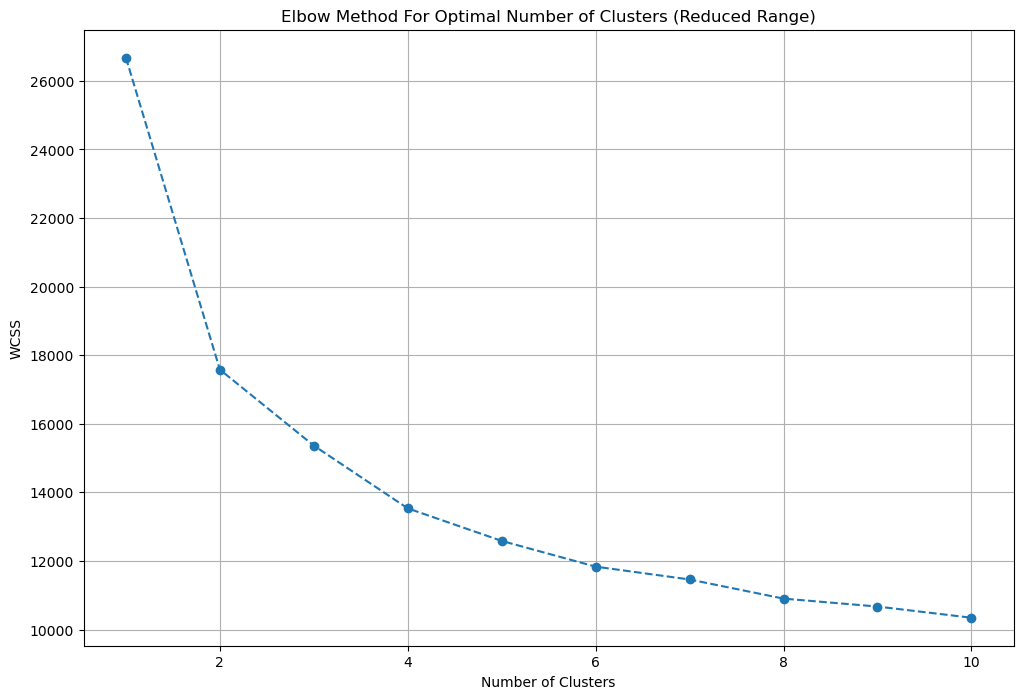

In [64]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [65]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [66]:
df['luxury_score'] = luxury_score

In [67]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,independent,sector 24,3.20,59259.0,540.0,Plot area 60(50.17 sq.m.),14,14,3+,not available,6.0,West,Relatively New,"['Dlf phase 3 metro station', 'Micromax moulsari avenue metro station', 'Dlf phase 2 metro station', 'Guru dronacharya metro station', 'Indusind bank cyber city metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Icici bank ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Abn amro bank ATM', 'Citibank ATM', 'Kotak mahindra ATM', 'Citibank ATM', 'Dental Cure and Care Centre', ""Dr. Khullar's Dental Clinic"", 'Garg Dental Care', 'Shri Ram Memorial Hospital', 'R.N Clinic', 'Dental Harbour', 'Asha Multispeciality Clinic', 'Upkar Clinic', ""St Stephen's Hospital Health Care Facility"", 'Relief Physiotherapy Clinic', 'Darpan Skin & Mind Clinic', 'Cosmodentz Dental Clinic', 'RBS Dental Clinic', 'Kailash Nursing Home Gurgaon', 'Krishna Family Clinic', 'Durga Poly Clinic', 'Anahat Hospital', 'Pharmacy', 'Shri Balaji Medical Store', 'State bank of india', 'Icici bank', 'Deutsche bank', 'Standard chartered bank', 'PVR Cinames', 'The God Father', 'Machaan', 'Food Court', 'Mc Donalds', 'barrique', ""McDonald's""]","['14 Bed', '14 Wardrobe', '1 Water Purifier', '1 Fridge', '14 AC', '14 TV', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Sofa', 'No Stove', 'No Washing Machine']","['Water Storage', 'Park']",NaN,540.0,NaN,0,0,0,0,0,0,"[Water Storage, Park]",15
1,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 1622 sq.ft. (150.69 sq.m.),19,17,3,"study room,servant room,store room,pooja room",4.0,North-West,Relatively New,"['Iffco chowk metro station', 'Citi bank ATM', 'Punjab national bank ATM', 'Icici bank ATM', 'Punjab national bank ATM', 'State bank of india ATM', 'Hdfc bank ATM', 'Hsbc bank ATM', 'Sangwan Hospital Gurgaon', 'Thukral Hospital', 'Apollo Cradle Hospital Gurgaon', 'Nagpal Nursing Home Gurgaon', 'Privat Hospital', 'Umkal Hospital', 'Community Center Sukhrali', 'Sector-14 Market', 'Catholic syrian bank', 'Karur vysay bank', 'Standard chartered bank', 'Oriental bank of commerce', 'Hdfc bank', 'Icici bank', 'Swagath', 'distillery', 'Walking Street', 'Gung the palace Korean restaurant', 'ADDA', 'KFC', 'Ardor 29', 'Gravity Space Bar', 'Black Mambaa', 'Tocpao', 'Bikanervala', 'Spaghetti Kitchen & Bar', 'Pizza Hut', 'Gola Sizzles', ""Hops 'N' Brew"", 'The Oriental Bloom Chinese and Thai', 'Zura', ""Domino's Pizza"", ""McDonald's"", 'Park Baluchi', 'MoB Ministory of Beer', 'Beer & Whisky Bar', 'Dhabba', 'Roots', 'Cafe Coffee Day', 'Management Development Institute']",NaN,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Visitor Parking', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Club house / Community Center']",NaN,1622.0,NaN,1,1,1,1,0,1,"[Feng Shui / Vaastu Compliant, Private Garden / Terrace, False Ceiling Lighting, Water Storage, Park, Visitor Parking, Natural Light, Internet/wi-fi connectivity, Airy Rooms, Spacious Interiors, Waste Disposal, Club house / Community Center]",74
2,flat,signature global the millennia,sector 37d,0.60,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet area: 596.12 sq.ft. (55.38 sq.m.),2,2,3,not available,7.0,NaN,New Property,"['Jharsha Chowk', 'Hero Honda Chowk', 'Rajiv Chowk', 'Umang Bhawaj Chawk', 'IMT Manesar', 'NH 8', 'Delhi', 'AIIMS Jhajjar', 'SGT Medical College', 'Vedic Hospital', 'Balaji Hospital', 'Dwarka Expressway', 'Gurgaon Railway Station', 'Basa

In [68]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [69]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1617,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2,2,1,0.0,East,New Property,NaN,NaN,690.00,0,0,0,0,0,1,49
1442,flat,maruti vihar,sector 28,1.00,9090.0,1100.0,Super Built up area 1100(102.19 sq.m.),1,1,1,1.0,North,Old Property,1100.0,NaN,NaN,1,0,0,1,0,2,80
1397,flat,experion the heartsong,sector 108,1.55,7738.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1550 sq.ft. (144 sq.m.),3,3,3+,7.0,North-East,Relatively New,2003.0,1750.0,1550.00,0,1,0,1,0,2,174
874,flat,mapsko mount ville,sector 79,1.28,8557.0,1496.0,Super Built up area 1490(138.43 sq.m.)Carpet area: 1063.91 sq.ft. (98.84 sq.m.),3,3,3,16.0,South,Relatively New,1490.0,NaN,1063.91,1,0,0,0,0,2,128
148,house,emaar mgf marbella,sector 66,NaN,NaN,NaN,Plot area 350(292.64 sq.m.),5,5,3+,3.0,East,Relatively New,NaN,350.0,NaN,1,1,0,1,0,2,160


In [70]:
df.shape

(3803, 23)

In [71]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)